### Importing Required Libraries

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### **Step1**: Acquire
<pre><b> • Explore problem<b> </pre>
<pre><b> • Identify data<b> </pre>
<pre><b> • Import data<b> </pre>

### **Data**
#### <pre><b>• Import and read the data</pre>

In [111]:
with open('roomlist.json') as d: 
    data=json.load(d)

In [112]:
data

{'value': [{'HotelId': '1',
   'HotelName': 'Secret Point Hotel',
   'Description': "This classic hotel is ideally located on the main commercial artery of the city in the heart of New York. A few minutes away is Time's Square and the historic centre of the city, as well as other places of interest that make New York one of America's most attractive and cosmopolitan cities.",
   'Description_fr': "Cet hôtel classique est idéalement situé sur la principale artère commerciale de la ville en plein cœur de New York. A quelques minutes se trouve la place du temps et le centre historique de la ville, ainsi que d'autres lieux d'intérêt qui font de New York l'une des villes les plus attractives et cosmopolites de l'Amérique.",
   'Category': 'Boutique',
   'Tags': ['view', 'air conditioning', 'concierge'],
   'ParkingIncluded': False,
   'LastRenovationDate': '2017-01-18T00:00:00Z',
   'Rating': 3.6,
   'Address': {'StreetAddress': '677 5th Ave',
    'City': 'New York',
    'StateProvince': 'N

In [113]:
#Get Columns Names
l=[]
for i,j in data['value'][0].items(): 
    l.append(i)

In [114]:
df=pd.DataFrame(columns=l)
df_rooms=pd.DataFrame()
d=data['value'][0]

In [115]:
def extract_data(d):
    for i in l:
        if type(d[i])==list: 
            if type(d[i][0])==dict: 
                df_rooms=pd.DataFrame.from_dict(d[i])
            else: 
                df[i]=d[i]
    for i in l:
        if type(d[i])==dict: 
            df[i]=""
            for k,v in d[i].items(): 
                if type(v)!=str:
                    v=[str(c) for c in v]
                    v=','.join(v)
                df[i]+=' '+v
    for i in l:
        df[i]=""
        if type(d[i])!=dict or type(d[i])!=list: 
            df[i]+=' '+str(d[i])
    return df,df_rooms

In [116]:
df,df_rooms=extract_data(d)

In [117]:
df.drop_duplicates(inplace=True)
df

,HotelId,HotelName,Description,Description_fr,Category,Tags,ParkingIncluded,LastRenovationDate,Rating,Address,Location,Rooms
0,1,Secret Point Hotel,This classic hotel is ideally located on the ...,Cet hôtel classique est idéalement situé sur ...,Boutique,"['view', 'air conditioning', 'concierge']",False,2017-01-18T00:00:00Z,3.6,"{'StreetAddress': '677 5th Ave', 'City': 'New...","{'type': 'Point', 'coordinates': [-73.975403,...","[{'Description': 'Budget Room, 1 Queen Bed (C..."


### **Step2**: Prepare
<pre><b> • Explore data<b> </pre>
<pre><b> • Visualize ideas<b> </pre>
<pre><b> • Cleaning data<b> </pre>


In [118]:
df

,HotelId,HotelName,Description,Description_fr,Category,Tags,ParkingIncluded,LastRenovationDate,Rating,Address,Location,Rooms
0,1,Secret Point Hotel,This classic hotel is ideally located on the ...,Cet hôtel classique est idéalement situé sur ...,Boutique,"['view', 'air conditioning', 'concierge']",False,2017-01-18T00:00:00Z,3.6,"{'StreetAddress': '677 5th Ave', 'City': 'New...","{'type': 'Point', 'coordinates': [-73.975403,...","[{'Description': 'Budget Room, 1 Queen Bed (C..."


In [119]:
df_rooms

,Description,Description_fr,Type,BaseRate,BedOptions,SleepsCount,SmokingAllowed,Tags
0,"Budget Room, 1 Queen Bed (Cityside)","Chambre Économique, 1 grand lit (côté ville)",Budget Room,96.99,1 Queen Bed,2,True,[vcr/dvd]
1,"Budget Room, 1 King Bed (Mountain View)","Chambre Économique, 1 très grand lit (Mountain...",Budget Room,80.99,1 King Bed,2,True,"[vcr/dvd, jacuzzi tub]"
2,"Deluxe Room, 2 Double Beds (City View)","Chambre Deluxe, 2 lits doubles (vue ville)",Deluxe Room,150.99,2 Double Beds,2,False,"[suite, bathroom shower, coffee maker]"
3,"Standard Room, 1 King Bed (Amenities)","Chambre Standard, 1 très grand lit (Services)",Standard Room,110.99,1 King Bed,2,False,"[Room Tags, bathroom shower, bathroom shower]"
4,"Suite, 1 Queen Bed (Mountain View)","Suite, 1 grand lit (vue sur la montagne)",Suite,243.99,1 Queen Bed,2,False,[Room Tags]
5,"Suite, 2 Queen Beds (Mountain View)","Suite, 2 grands lits (vue sur la montagne)",Suite,229.99,2 Queen Beds,4,True,[vcr/dvd]
6,"Budget Room, 1 King Bed (Waterfront View)","Chambre Économique, 1 très grand lit (vue sur ...",Budget Room,87.99,1 King Bed,2,False,[tv]
7,"Suite, 1 King Bed (Waterfront View)","Suite, 1 très grand lit (vue sur le front de mer)",Suite,262.99,1 King Bed,2,False,"[vcr/dvd, vcr/dvd]"
8,"Suite, 2 Double Beds (Mountain View)","Suite, 2 lits doubles (vue sur la montagne)",Suite,248.99,2 Double Beds,2,False,"[coffee maker, coffee maker, coffee maker]"
9,"Suite, 1 King Bed (Mountain View)","Suite, 1 très grand lit (vue sur la montagne)",Suite,234.99,1 King Bed,2,True,[tv]


In [120]:
df_rooms.describe()

,BaseRate,SleepsCount
count,13.000000,13.000000
mean,159.528462,2.153846
std,74.393789,0.554700
min,55.990000,2.000000
25%,96.990000,2.000000
50%,146.990000,2.000000
75%,234.990000,2.000000
max,262.990000,4.000000


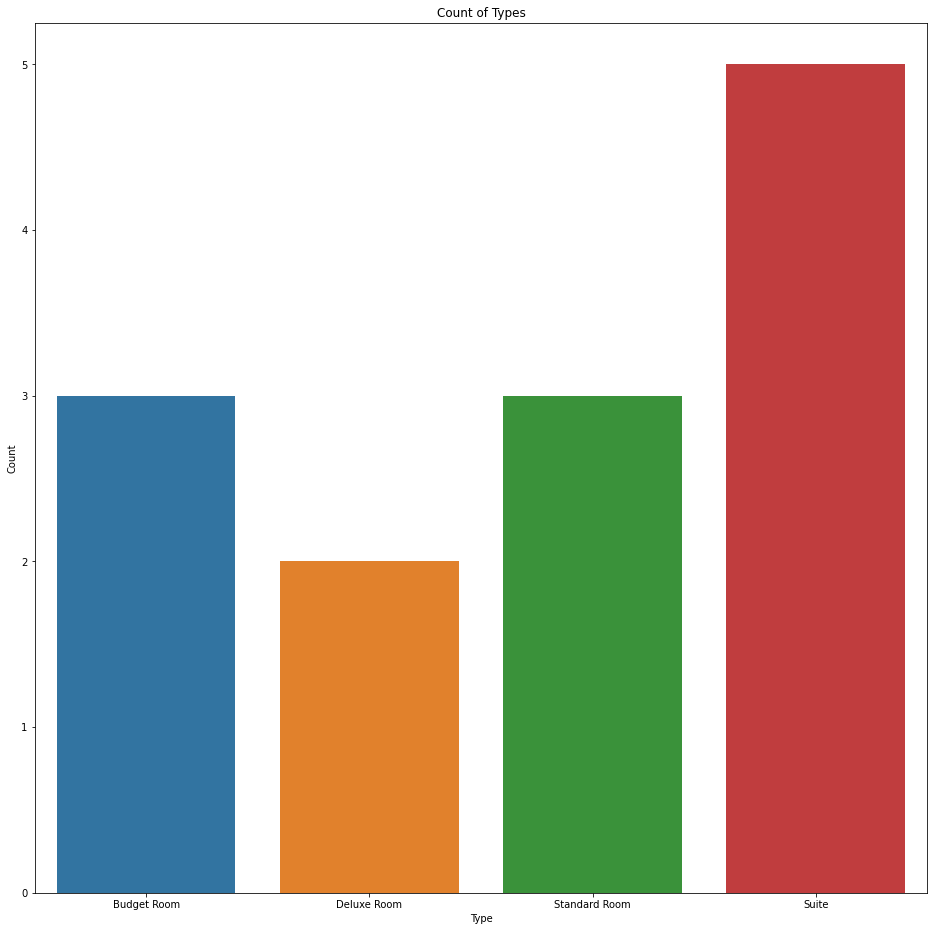

In [121]:
plt.figure(figsize=(16,16))
sns.countplot(df_rooms['Type'])
plt.xlabel('Type');plt.ylabel('Count');plt.title('Count of Types')
plt.show()

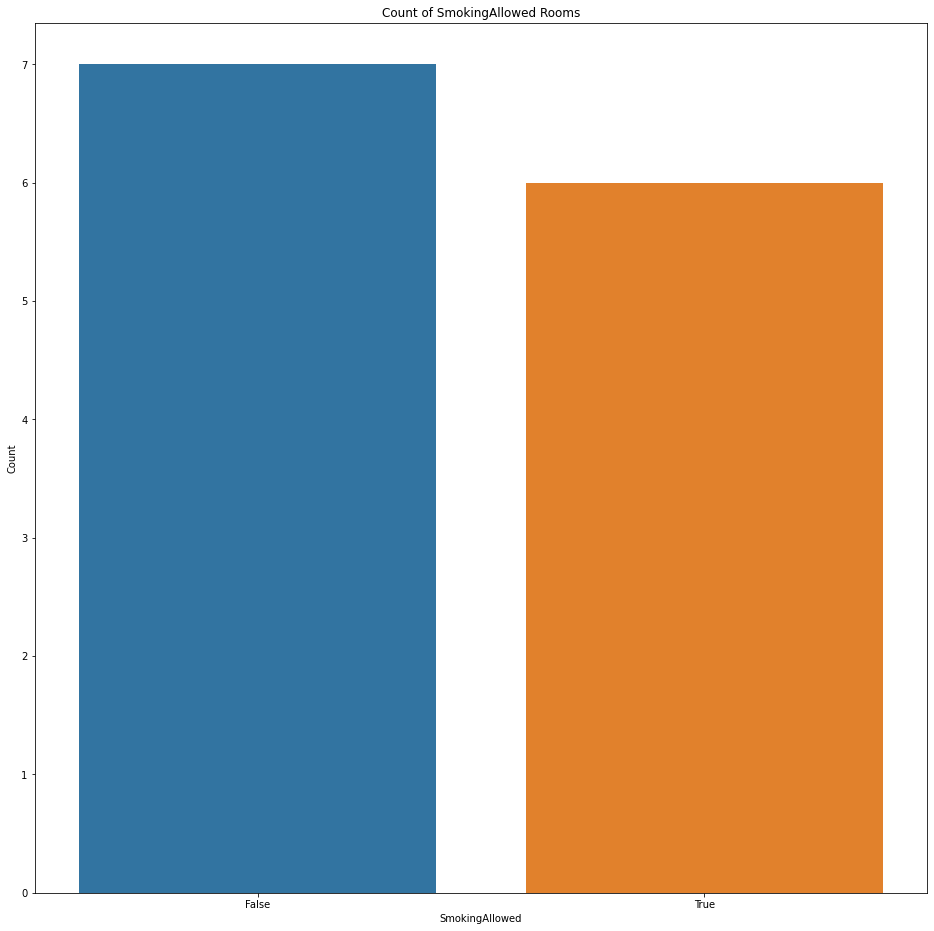

In [122]:
plt.figure(figsize=(16,16))
sns.countplot(df_rooms['SmokingAllowed'])
plt.xlabel('SmokingAllowed');plt.ylabel('Count');plt.title('Count of SmokingAllowed Rooms')
plt.show()

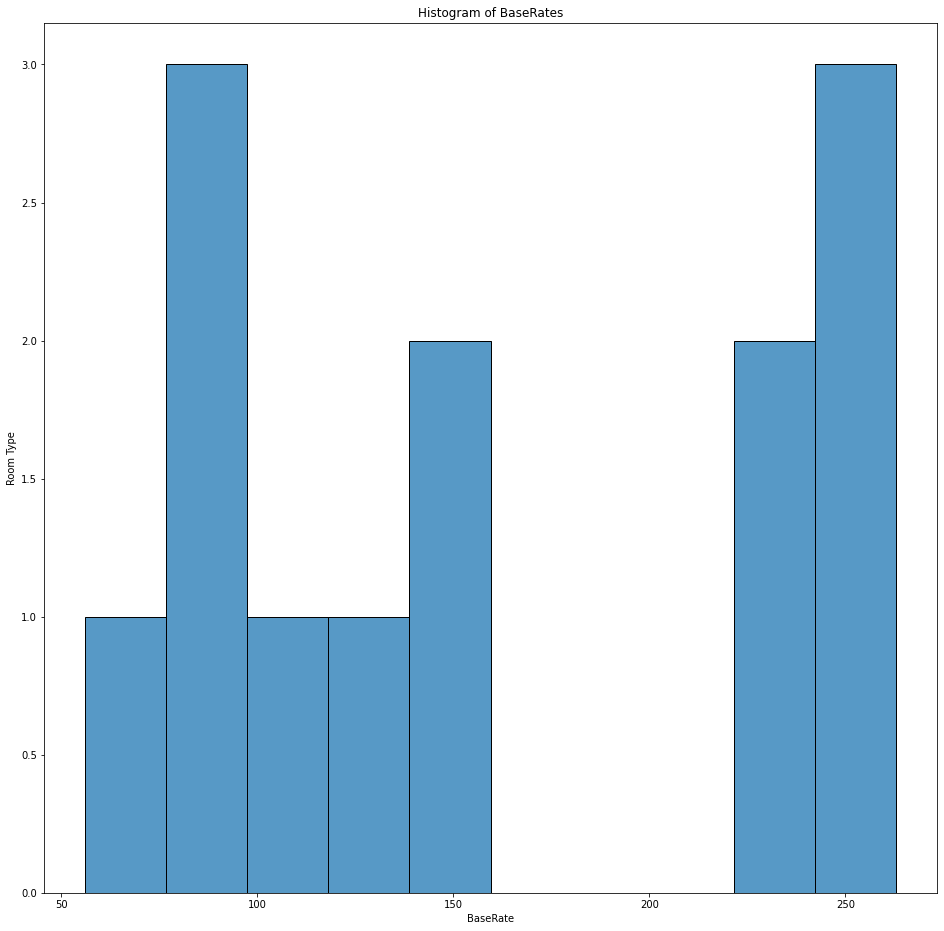

In [123]:
plt.figure(figsize=(16,16))
sns.histplot(x=df_rooms['BaseRate'],bins=10)
plt.xlabel('BaseRate');plt.ylabel('Room Type')
plt.title('Histogram of BaseRates')
plt.show()

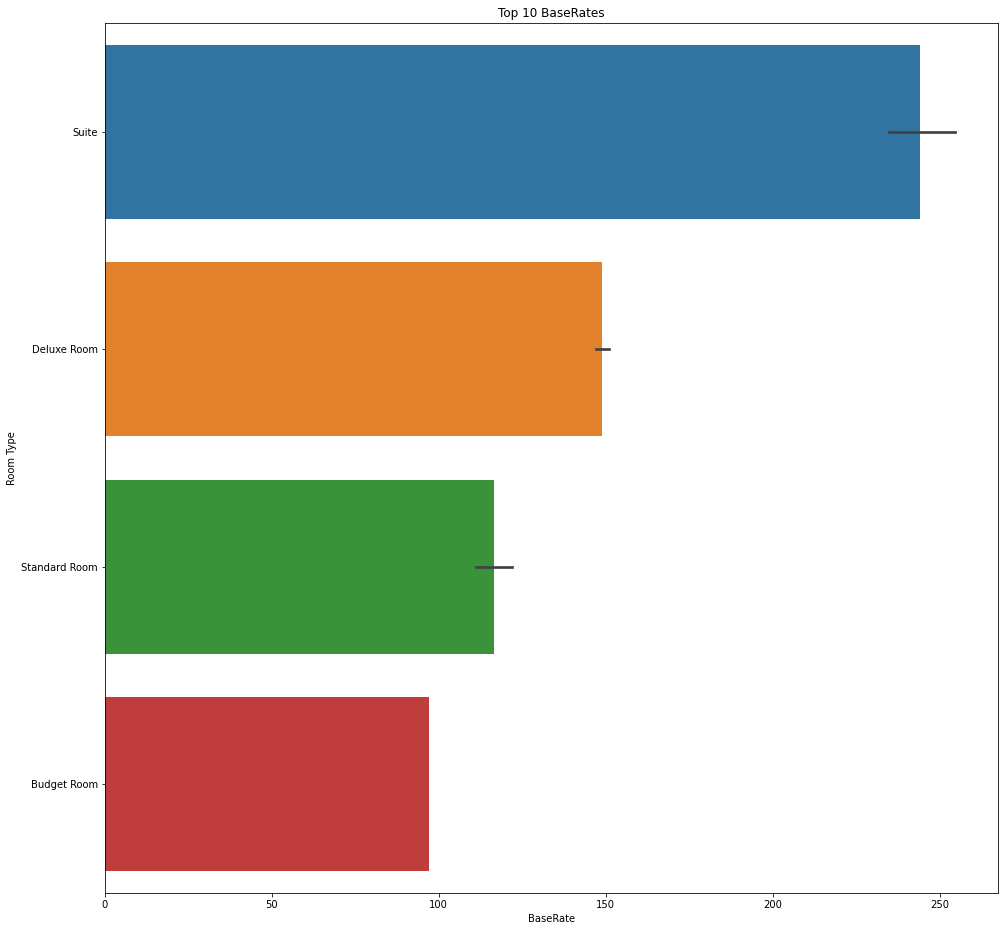

In [124]:
plt.figure(figsize=(16,16))
part_df=df_rooms.sort_values('BaseRate',ascending=False).head(10)
sns.barplot(x=part_df['BaseRate'],y=part_df['Type'])
plt.xlabel('BaseRate');plt.ylabel('Room Type')
plt.title('Top 10 BaseRates')
plt.show()